In [27]:
import plotnine as p9
import pandas as pd
import matplotlib.pyplot as plt 
from plotnine import ggplot, aes, geom_line,labs,theme,geom_bar,geom_point,geom_col,theme_bw

In [116]:
DFmerge = pd.DataFrame()
df10 = pd.read_csv('temporal_10_neuronios.csv',encoding='utf-8',sep=',')
df10['neuronio'] = 10
DFmerge = pd.concat([DFmerge, df10])
df25 = pd.read_csv('temporal_25_neuronios.csv',encoding='utf-8',sep=',')
df25['neuronio'] = 25
DFmerge = pd.concat([DFmerge, df25])
df50 = pd.read_csv('temporal_50_neuronios.csv',encoding='utf-8',sep=',')
df50['neuronio'] = 50
DFmerge = pd.concat([DFmerge, df50])

parameters = ['Coliformes Termotolerantes', 'Oxigênio Dissolvido', 'Turbidez', 'Fósforo Total', 'Sólido Total', 'DBO (5, 20)', 'Temperatura da Água', 'pH']

#Elimina os resultados dos parâmetros coliformes, turbidez e OD, pois as suas altas médias de erro.
DFmerge = DFmerge[DFmerge['parametro'] != 'Coliformes Termotolerantes'] 
DFmerge = DFmerge[DFmerge['parametro'] != 'Turbidez']
DFmerge = DFmerge[DFmerge['parametro'] != 'Oxigênio Dissolvido'] 
#Seleciona os registros com apenas lag  = 5
DFmerge = DFmerge[DFmerge['lag'] == 5]
DF = DFmerge
#for parameter in parameters:

    #DF = DFmerge[DFmerge['lag'] == 5] 
    #DF = DF[DF['parametro'] == parameter] 
#DFmerge = DFmerge[DFmerge['neuronio'] == 50]
#DFmerge
    #print(parameter)
    #print(round(DF.describe().mse.mean(),2))
#df = df[df['parametro'] == 'Sólido Total'] 
#df = df[df['parametro'] == 'Temperatura da Água'] 
#df = df[df['parametro'] == 'pH']
#df = df[df['parametro'] != 'Fósforo Total'] 
#df = df[df['parametro'] != 'Oxigênio Dissolvido'] 
#df = df[df['parametro'] != 'DBO (5, 20)']
#df = df[df['parametro'] != 'Turbidez']

#sorted_DFmerge=DFmerge.sort_values(by=['mse'])
#sorted_DFmerge

#DF = DFmerge[DFmerge['lag'] == 5] 
#DF = DF[DF['tecnica'] == 'MLP'] 
#Seleciona a média dos neurônios por técnicas.
#DF = DF.groupby(['neuronio','tecnica']).mean()
#Seleciona a média dos parâmetros por técnicas.
#DF = DF.groupby(['parametro','tecnica']).mean()
#Seleciona a média geral das técnicas.
DF = DF.groupby(['tecnica']).mean()
#Seleciona a média parametros por neuronios.
#DF = DF.groupby(['parametro','neuronio']).mean()
DF = DF.reset_index()
DF = DF.round(2)

#DF = DF.drop(['amostras','mape','rmse','lag','neuronio'],axis=1)

#print('mse medio neuronios')
#myplot = (ggplot(DF) + aes(x='neuronio', y='mse')+ labs(title="LSTM",x="Neurônios",y="MSE médio",)+ geom_line()+ theme_bw() + theme(text=p9.element_text(size=16)))

#print('mse medio parametros')
#myplot = (ggplot(DF) + aes(x='mse',y='parametro')+ labs(title="LSTM",x="MSE médio",y="Parâmetros")+ geom_point() + theme_bw() + theme(text=p9.element_text(size=16)))

#myplot = (ggplot(DF, p9.aes(x='parametro', y='rmse', fill='tecnica')) + labs(title="RMSE médio por modelo e parâmetros",x="Parâmetros",y="RMSE médio")
 #+ geom_col(stat='identity', position='dodge')+ theme(figure_size=(14, 4),text=p9.element_text(size=16)))

#myplot = (ggplot(DF, p9.aes(x='factor(neuronio)', y='rmse', fill='tecnica')) + labs(title="RMSE médio por modelo e nº de neurônios",x="Neurônios",y="RMSE médio")
 #+ geom_col(stat='identity', position='dodge')+ theme(figure_size=(8, 4),text=p9.element_text(size=16)))


#myplot.save(filename = 'fig_rmse_neuronios2.png', height=4, width=8, units = 'in')

#myplot
#DF.round(2)
DF
#DFmerge


,tecnica,amostras,mape,mse,rmse,lag,neuronio
0,LSTM,186.4,5.68,0.11,0.21,5.0,28.33
1,MLP,186.4,5.55,0.10,0.21,5.0,28.33


mape por neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 3.2 x 5 in image.
C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: fig_dbo2.png


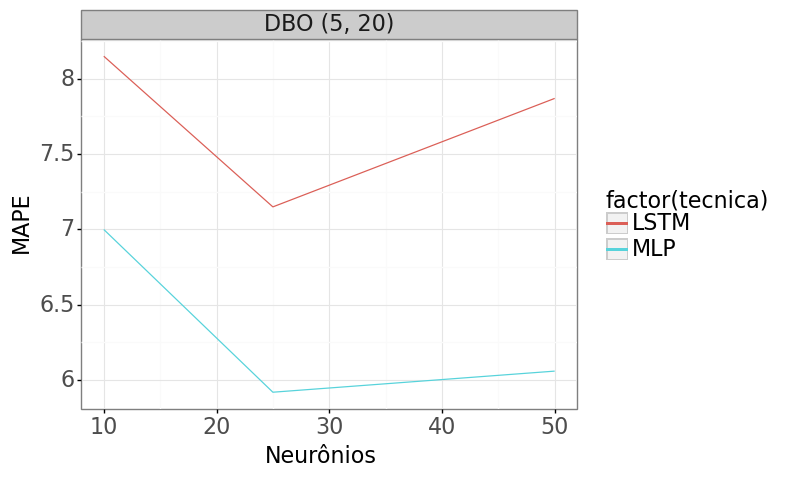

<ggplot: (74984560391)>

In [51]:
df = DFmerge

df = df[df['parametro'] != 'Sólido Total'] 
df = df[df['parametro'] != 'Temperatura da Água'] 
df = df[df['parametro'] != 'pH']
df = df[df['parametro'] != 'Fósforo Total'] 
#df = df[df['parametro'] != 'DBO (5, 20)']
    
print('mape por neuronios')
myplot = (p9.ggplot(df, p9.aes('neuronio', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x') + labs(x="Neurônios",y="MAPE") + theme_bw() + theme(text=p9.element_text(size=16) 
    ))

myplot.save(filename = 'fig_dbo2.png', height=5, width=3.2, units = 'in')

myplot

mape por neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


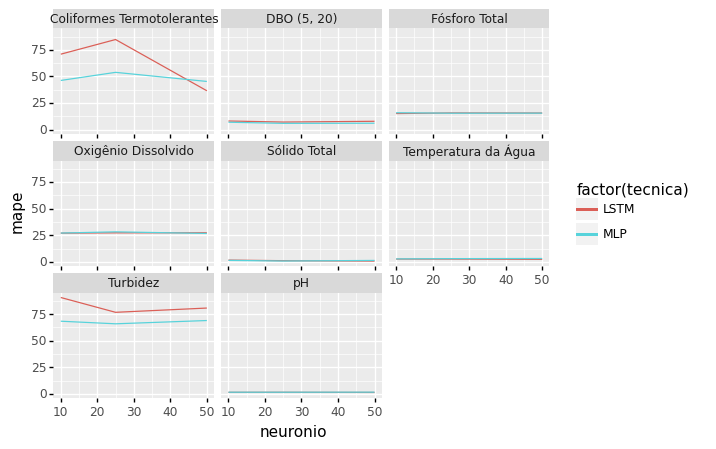

<ggplot: (134554924439)>

In [27]:
print('mape por neuronios')
myplot = (p9.ggplot(DFmerge, p9.aes('neuronio', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

mape por neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: grupo1-CT.png


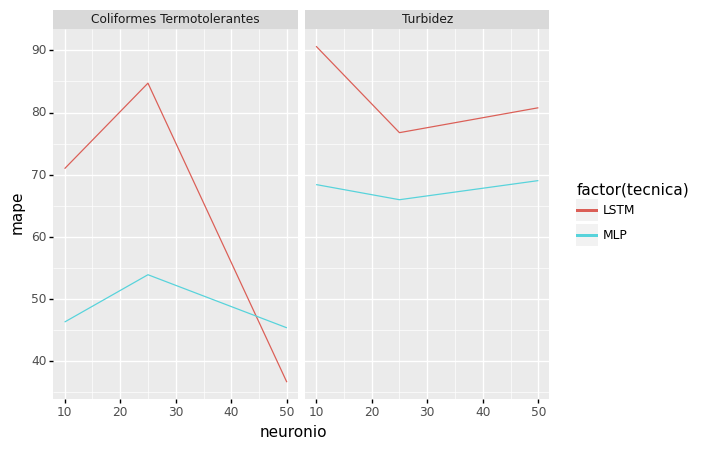

<ggplot: (134552695911)>

In [28]:
df = DFmerge
df = df[df['parametro'] != 'Sólido Total'] 
df = df[df['parametro'] != 'Temperatura da Água'] 
df = df[df['parametro'] != 'pH']
df = df[df['parametro'] != 'Fósforo Total'] 
df = df[df['parametro'] != 'Oxigênio Dissolvido'] 
df = df[df['parametro'] != 'DBO (5, 20)']
    
print('mape por neuronios')
myplot = (p9.ggplot(df, p9.aes('neuronio', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot.save(filename = 'grupo1-CT.png', height=5, width=5, units = 'in')

myplot

mape por neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: grupo2-DFO.png


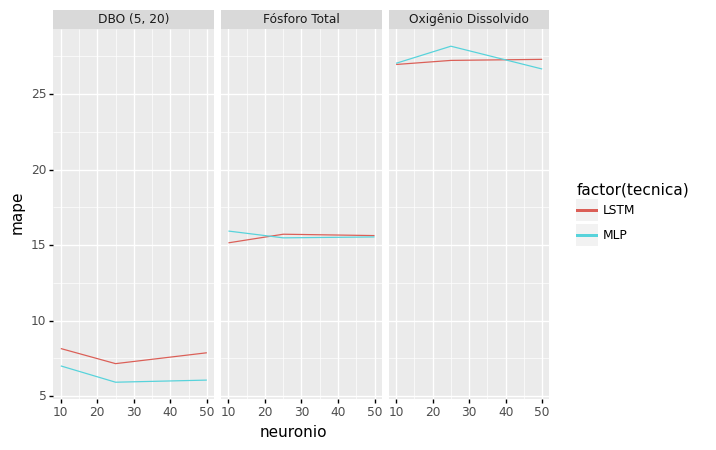

<ggplot: (134554985578)>

In [31]:
df = DFmerge
df = df[df['parametro'] != 'Coliformes Termotolerantes'] 
df = df[df['parametro'] != 'Turbidez']
df = df[df['parametro'] != 'Sólido Total'] 
df = df[df['parametro'] != 'Temperatura da Água'] 
df = df[df['parametro'] != 'pH']
    
print('mape por neuronios')
myplot = (p9.ggplot(df, p9.aes('neuronio', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot.save(filename = 'grupo2-DFO.png', height=5, width=5, units = 'in')

myplot

mape por neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: grupo2-DFO.png


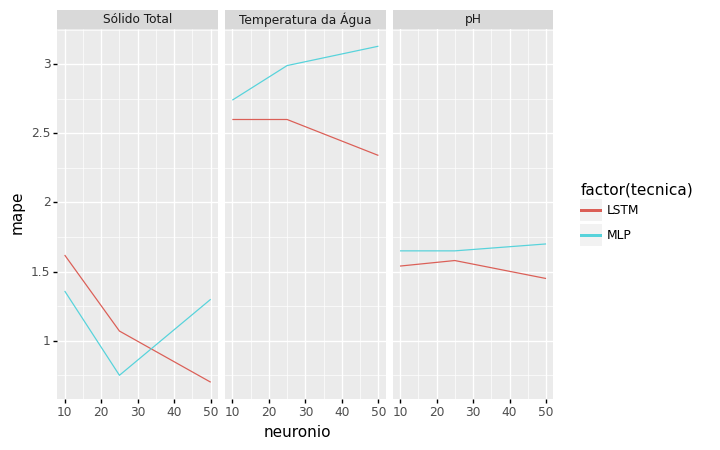

<ggplot: (134555735182)>

In [32]:
df = DFmerge
df = df[df['parametro'] != 'Coliformes Termotolerantes'] 
#df = df[df['parametro'] == 'Sólido Total'] 
#df = df[df['parametro'] == 'Temperatura da Água'] 
#df = df[df['parametro'] == 'pH']
df = df[df['parametro'] != 'Fósforo Total'] 
df = df[df['parametro'] != 'Oxigênio Dissolvido'] 
df = df[df['parametro'] != 'DBO (5, 20)']
df = df[df['parametro'] != 'Turbidez']
    
print('mape por neuronios')
myplot = (p9.ggplot(df, p9.aes('neuronio', 'mse', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot.save(filename = 'grupo2-DFO.png', height=5, width=5, units = 'in')

myplot

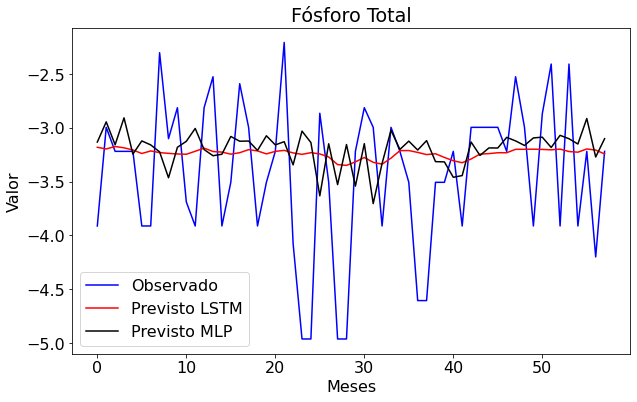

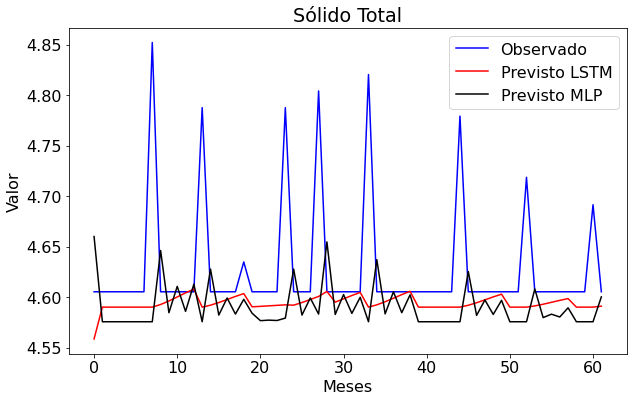

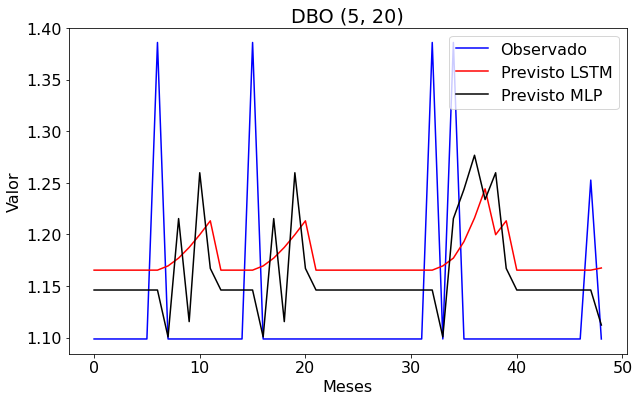

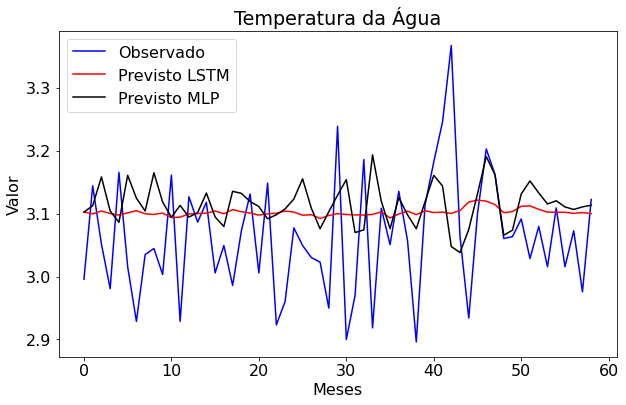

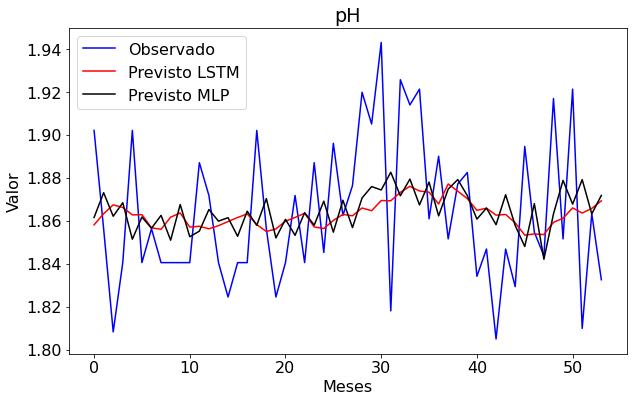

In [59]:
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] = (10,6)

#parameters = ['Coliformes Termotolerantes', 'Oxigênio Dissolvido', 'Turbidez', 'Fósforo Total', 'Sólido Total', 'DBO (5, 20)', 'Temperatura da Água', 'pH']
parameters = ['Fósforo Total', 'Sólido Total', 'DBO (5, 20)', 'Temperatura da Água', 'pH']
for parameter in parameters:
   
    df1 = pd.read_csv('10temporal_lstm_'+parameter+'.csv',encoding='utf-8',sep=',')
    df2 = pd.read_csv('10temporal_mlp_'+parameter+'.csv',encoding='utf-8',sep=',')

    #df1.index = df1['data_coleta'] 
    #df1 = df1.drop(['data_coleta'], axis=1)
    DFmerge = pd.DataFrame()
    DFmerge = pd.merge(df1, df2, on="data_coleta")
    #DFmerge

    plt.plot(DFmerge.observado_x.values,label='Observado', c = 'blue')
    plt.plot(DFmerge.previsao_x.values,label='Previsto LSTM', c = 'red')
    plt.plot(DFmerge.previsao_y.values,label='Previsto MLP', c = 'black')
    plt.xlabel('Meses')
    plt.ylabel('Valor')
    plt.title(parameter)
    plt.legend()
    plt.show()



In [77]:
DFmerge = pd.DataFrame()
df1 = pd.read_csv('50temporal_lstm_coliformes.csv',encoding='utf-8',sep=',',index_col=[0])
#df1['tecnica'] = 'LSTM'
df2 = pd.read_csv('50temporal_mlp_coliformes.csv',encoding='utf-8',sep=',',index_col=[0])

#df1: -1.079540 df2: 2.397208

df1.index = df1['data_coleta'] 
df1 = df1.drop(['data_coleta'], axis=1)

DFmerge = pd.merge(df1, df2, on="data_coleta")
DFmerge

,observado_x,previsao_x,observado_y,previsao_y
data_coleta,,,,
2001-09-30,3.713572,-1.079540,3.713572,2.397208
2001-11-30,1.945910,-1.608727,1.945910,-1.490814
2002-03-31,5.480639,-2.117172,5.480639,-2.848933
2002-05-31,3.610918,-3.187646,3.610918,-7.994709
2002-07-31,2.079442,0.636137,2.079442,1.907510
2002-09-30,3.988984,0.781677,3.988984,2.762049
2003-01-31,4.787492,0.737967,4.787492,2.459721
2003-04-30,2.833213,1.045064,2.833213,3.244378
2003-05-31,3.713572,0.726430,3.713572,2.455366


temporal_10_neuronios


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


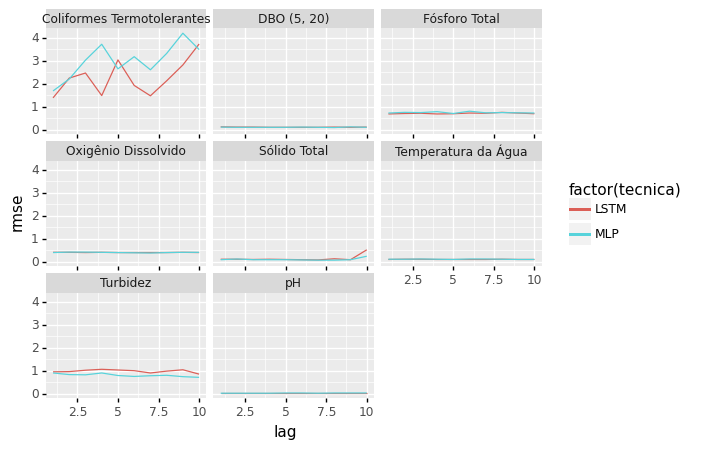

<ggplot: (134554787518)>

In [10]:
df = pd.read_csv('temporal_10_neuronios.csv',encoding='utf-8',sep=',')
   
print('temporal_10_neuronios')
myplot = (p9.ggplot(df, p9.aes('lag', 'rmse', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

temporal_pad_lag_limpo


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: grupo3.png


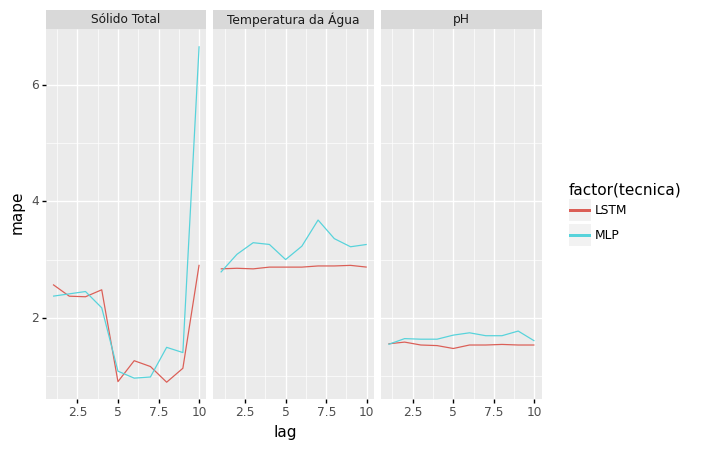

<ggplot: (103865093178)>

In [54]:
df = pd.read_csv('temporal_pad_lag_limpo.csv',encoding='utf-8',sep=',')

df = df[df['tecnica'] != 'Random Forest'] 
df = df[df['tecnica'] != 'Regressão Linear']
df = df[df['parametro'] != 'Coliformes Termotolerantes'] 
df = df[df['parametro'] != 'Oxigênio Dissolvido'] 
df = df[df['parametro'] != 'Turbidez']
df = df[df['parametro'] != 'DBO (5, 20)']
df = df[df['parametro'] != 'Fósforo Total'] 
    
print('temporal_pad_lag_limpo')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot.save(filename = 'grupo3.png', height=5, width=5, units = 'in')

myplot

temporal_pad_lag_sujo


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


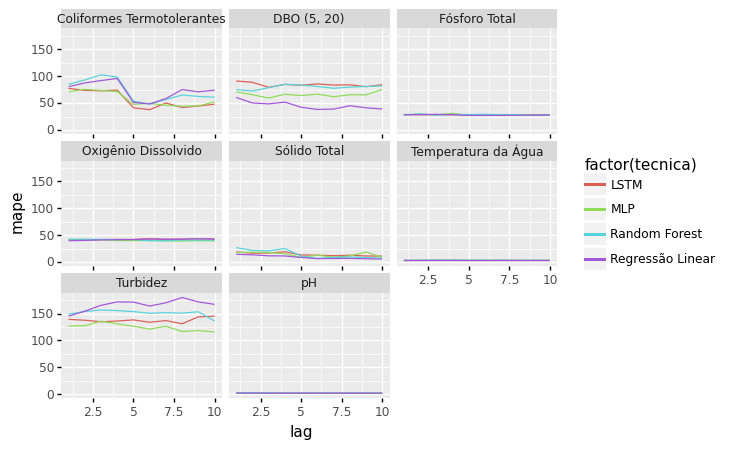

<ggplot: (103864387033)>

In [25]:
csvs = ['temporal_pad_lag_limpo', 'temporal_pad_lag_sujo', 'temporal_pad_lag_limpo_relu', 
        'espaco_temporal_pad_lag_limpo','espaco_temporal_pad_lag_sujo','espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('temporal_pad_lag_sujo.csv',encoding='utf-8',sep=',')
    
print('temporal_pad_lag_sujo')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

temporal_pad_lag_limpo_relu


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


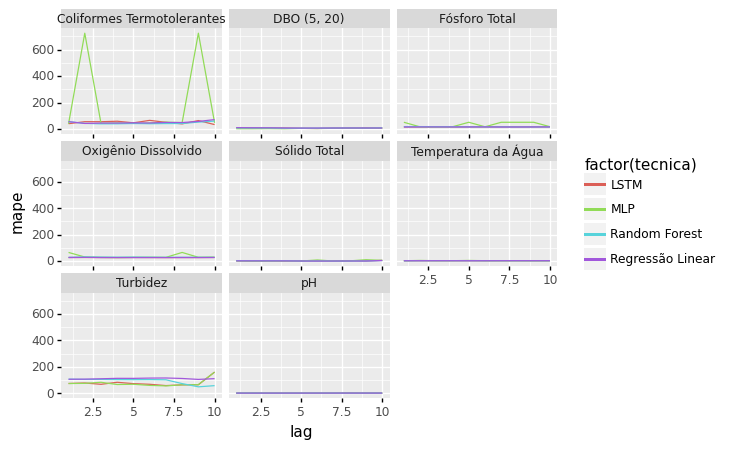

<ggplot: (103867179987)>

In [28]:
csvs = [ 'temporal_pad_lag_limpo_relu', 
        'espaco_temporal_pad_lag_limpo','espaco_temporal_pad_lag_sujo','espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('temporal_pad_lag_limpo_relu.csv',encoding='utf-8',sep=',')
    
print('temporal_pad_lag_limpo_relu')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

temporal_pad_lag_limpo_relu2


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


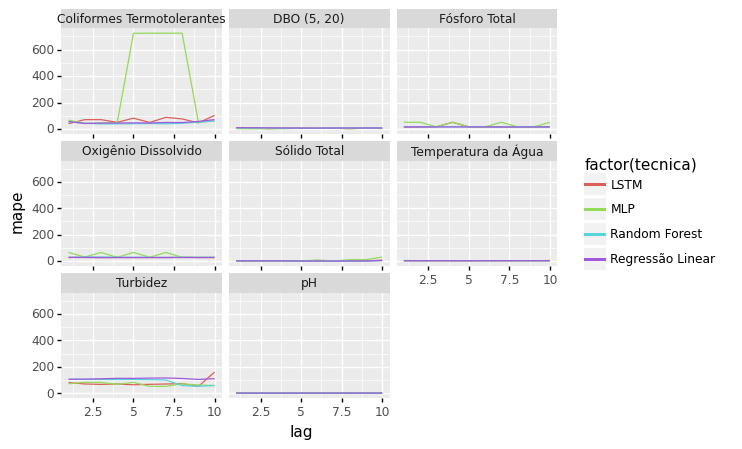

<ggplot: (103865054513)>

In [35]:
csvs = [ 'temporal_pad_lag_limpo_relu', 
        'espaco_temporal_pad_lag_limpo','espaco_temporal_pad_lag_sujo','espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('temporal_pad_lag_limpo_relu2.csv',encoding='utf-8',sep=',')
    
print('temporal_pad_lag_limpo_relu2')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

espaco_temporal_pad_lag_limpo


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


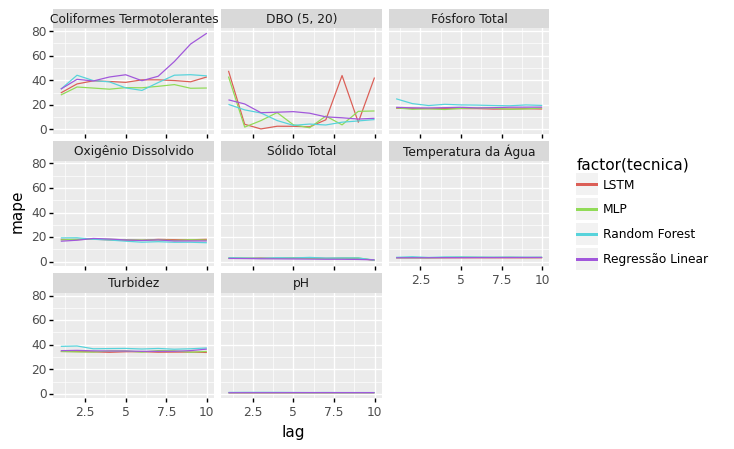

<ggplot: (103864395331)>

In [30]:
csvs = ['espaco_temporal_pad_lag_limpo','espaco_temporal_pad_lag_sujo','espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('espaco_temporal_pad_lag_limpo.csv',encoding='utf-8',sep=',')
    
print('espaco_temporal_pad_lag_limpo')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

espaco_temporal_pad_lag_sujo


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


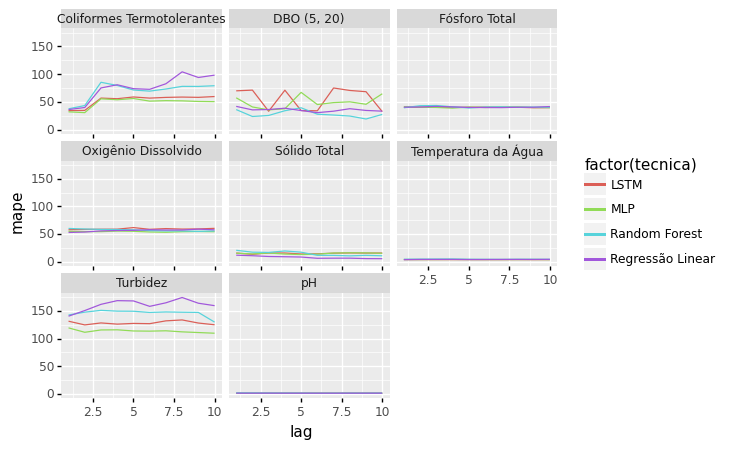

<ggplot: (103867290082)>

In [33]:
csvs = ['espaco_temporal_pad_lag_sujo','espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('espaco_temporal_pad_lag_sujo.csv',encoding='utf-8',sep=',')
    
print('espaco_temporal_pad_lag_sujo')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot

espaco_temporal_pad_lag_limpo_relu


C:\Users\Anderson\anaconda3\lib\site-packages\plotnine\facets\facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


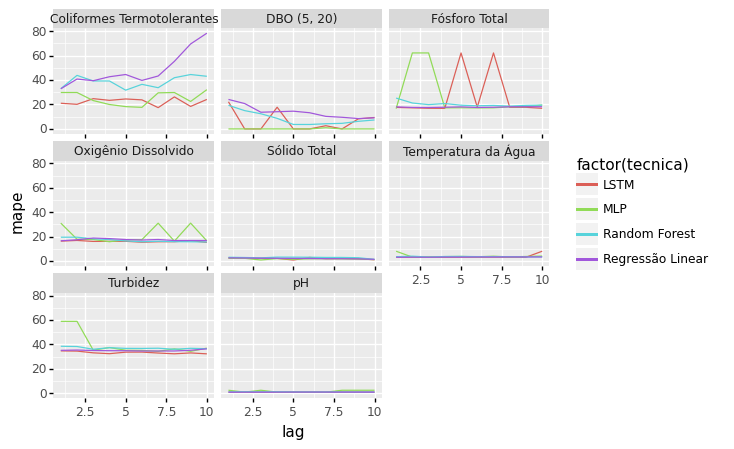

<ggplot: (103864801271)>

In [32]:
csvs = ['espaco_temporal_pad_lag_limpo_relu']

df = pd.read_csv('espaco_temporal_pad_lag_limpo_relu.csv',encoding='utf-8',sep=',')
    
print('espaco_temporal_pad_lag_limpo_relu')
myplot = (p9.ggplot(df, p9.aes('lag', 'mape', fill='tecnica', color='factor(tecnica)')) +
  p9.geom_line() +
  p9.facet_wrap('~parametro', scales='free_x'))

myplot